# Importing the required libraries

In [1]:
import numpy
import tensorflow #open source used for both ML and DL for computation
from tensorflow.keras.datasets import mnist #mnist dataset
from tensorflow.keras.models import Sequential #it is a plain stack of layers
from tensorflow.keras import layers #A Layer consists of a tensor- in tensor-out computat ion funct ion
from tensorflow.keras.layers import Dense, Flatten #Dense-Dense Layer is the regular deeply connected r
#faltten -used fot flattening the input or change the dimension
from tensorflow.keras.layers import Conv2D #onvoLutiona l Layer
#from keras.optimizers import Adam #opt imizer
from keras. utils import np_utils #used for one-hot encoding
import matplotlib.pyplot as plt   #used for data visualization

# load data

In [2]:
(x_train, y_train), (x_test, y_test)=mnist.load_data () #splitting the mnist data into train and test

In [3]:
print (x_train.shape)  #shape is used for give the dimens ion values #60000-rows 28x28-pixels
print (x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [4]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

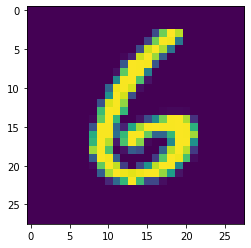

In [5]:
plt.imshow(x_train[6000])     #ploting the index=image

In [6]:
numpy.argmax(y_train[6000])

0

# Reshaping Dataset

In [7]:
#Reshaping to format which CNN expects (batch, height, width, channels)
x_train=x_train.reshape (60000, 28, 28, 1).astype('float32')
x_test=x_test.reshape (10000, 28, 28, 1).astype ('float32')

# Applying One Hot Encoding

In [8]:
number_of_classes = 10  #storing the no of classes in a variable

In [9]:
y_train = np_utils.to_categorical (y_train, number_of_classes) #converts the output in binary format
y_test = np_utils.to_categorical (y_test, number_of_classes)

# Add CNN Layers

In [10]:
#create model
model=Sequential ()

In [11]:
#adding modeL Layer
model.add(Conv2D(64, (3, 3), input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(32, (3, 3), activation = 'relu'))

In [12]:
#flatten the dimension of the image
model.add(Flatten())

In [13]:
#output layer with 10 neurons
model.add(Dense(number_of_classes,activation = 'softmax'))

# Compiling the model

In [14]:
#Compile model
model.compile(loss= 'categorical_crossentropy', optimizer="Adam", metrics=['accuracy'])

In [15]:
x_train = numpy.asarray(x_train)
y_train = numpy.asarray(y_train)

# Train the model

In [16]:
#fit the model
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5, batch_size=32)

Epoch 1/5
1875/1875 [==============================] - 108s 57ms/step - loss: 0.2176 - accuracy: 0.9536 - val_loss: 0.0773 - val_accuracy: 0.9755
Epoch 2/5
1875/1875 [==============================] - 110s 59ms/step - loss: 0.0656 - accuracy: 0.9794 - val_loss: 0.0882 - val_accuracy: 0.9757
Epoch 3/5
1875/1875 [==============================] - 108s 58ms/step - loss: 0.0455 - accuracy: 0.9867 - val_loss: 0.1006 - val_accuracy: 0.9713
Epoch 4/5
1875/1875 [==============================] - 108s 57ms/step - loss: 0.0359 - accuracy: 0.9882 - val_loss: 0.0734 - val_accuracy: 0.9803
Epoch 5/5
1875/1875 [==============================] - 108s 57ms/step - loss: 0.0289 - accuracy: 0.9907 - val_loss: 0.0869 - val_accuracy: 0.9782


# Observing the metrics

In [17]:
# Final evaluation of the model
metrics = model.evaluate(x_test, y_test, verbose=0)
print("Metrics (Test loss &Test Accuracy) : ")
print(metrics)

Metrics (Test loss &Test Accuracy) : 
[0.0868639126420021, 0.9782000184059143]


# Test The Model

In [18]:
prediction=model.predict(x_test[6000:6001])
print(prediction)

[[6.0700490e-15 2.9475720e-14 3.3868677e-10 2.9112452e-09 1.9605618e-03
  1.0061643e-06 1.1362808e-12 3.8542791e-04 1.0910545e-06 9.9765199e-01]]


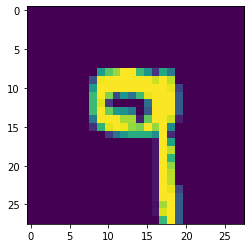

In [19]:
plt.imshow(x_test[6000])

In [20]:
import numpy as np
print(np.argmax(prediction, axis=1)) #printing our Labels from first 4 images

[9]


In [21]:
np.argmax(y_test[6000:6001]) #printing the actual labels

9

# Save The model

In [67]:
# Save the model
model.save('models/mnistCNN.h5')

In [75]:
cd models

[Errno 2] No such file or directory: 'models'
/home/wsuser/work/models


In [76]:
ls

mnistCNN.h5


In [77]:
!tar -zcvf hdr_deployment.tgz mnistCNN.h5

mnistCNN.h5


In [78]:
ls -1

hdr_deployment.tgz
mnistCNN.h5


# Cloud deploy


In [23]:
!pip install -U ibm-watson-machine-learning

In [52]:
from ibm_watson_machine_learning import APIClient
credentials ={
    "url":"https://us-south.ml.cloud.ibm.com",
    "apikey": "3rOdoqX0g-y3SFPJyngfww-p9LcUhoyNBIiY34tCAYsm"
}
client = APIClient(credentials)

In [53]:
client.spaces.get_details()

{'resources': [{'entity': {'compute': [{'crn': 'crn:v1:bluemix:public:pm-20:us-south:a/47abf318d4794b229c16e8f0270a723f:e3130ac1-3cdb-414a-b06e-7e40fa9a643c::',
      'guid': 'e3130ac1-3cdb-414a-b06e-7e40fa9a643c',
      'name': 'Watson Machine Learning-fq',
      'type': 'machine_learning'}],
    'description': '',
    'name': 'Handwritten recognition',
    'scope': {'bss_account_id': '47abf318d4794b229c16e8f0270a723f'},
    'stage': {'production': False},
    'status': {'state': 'active'},
    'storage': {'properties': {'bucket_name': 'b60679a5-6e93-4e92-b0da-972ac47a5a78',
      'bucket_region': 'us-south',
      'credentials': {'admin': {'access_key_id': 'f01c8a8c6efa4e48b2480641d3ba34af',
        'api_key': 'RGGtm1Sp0uA6Hh85ewdi39qy0CZIuoSZrJp9gjc8MWLE',
        'secret_access_key': '085c88b71ae3609ffefff76804e33bdd38023b69513917be',
        'service_id': 'ServiceId-99dcddd1-5770-4e6a-9ab8-827785e02cd1'},
       'editor': {'access_key_id': '20470cfb96324028a4329f6b75a8fb72',
     

In [55]:
wml_clients=APIClient(wml_cred)
wml_clients.spaces.list()

Note: 'limit' is not provided. Only first 50 records will be displayed if the number of records exceed 50
------------------------------------  -----------------------  ------------------------
ID                                    NAME                     CREATED
f6ca7717-a4b6-4bcc-81c9-b83c200a3135  Handwritten recognition  2022-11-19T10:16:16.154Z
------------------------------------  -----------------------  ------------------------


In [56]:
space_id="f6ca7717-a4b6-4bcc-81c9-b83c200a3135"

In [57]:
client.set.default_space(space_id)

'SUCCESS'

In [58]:
client.software_specifications.list(limit=100)

-------------------------------  ------------------------------------  ----
NAME                             ASSET_ID                              TYPE
default_py3.6                    0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12        020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt       069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6          09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12       09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9        0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6            0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                       0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod     1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6                10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl        111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt

In [60]:
software_space_uid = client.software_specifications.get_uid_by_name('tensorflow_rt22.1-py3.9')
software_space_uid

'acd9c798-6974-5d2f-a657-ce06e986df4d'

In [70]:
cd models

[Errno 2] No such file or directory: 'models'
/home/wsuser/work/models


In [72]:
ls

mnistCNN.h5


In [79]:
model_details = client.repository.store_model(model='hdr_deployment.tgz',meta_props={
    client.repository.ModelMetaNames.NAME:"Digit Recognition System",
    client.repository.ModelMetaNames.TYPE:"tensorflow_2.7",
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_space_uid
})

In [80]:
model_details

{'entity': {'hybrid_pipeline_software_specs': [],
  'software_spec': {'id': 'acd9c798-6974-5d2f-a657-ce06e986df4d',
   'name': 'tensorflow_rt22.1-py3.9'},
  'type': 'tensorflow_2.7'},
 'metadata': {'created_at': '2022-11-19T11:33:53.501Z',
  'id': '0feb60bc-30a8-40c0-a08c-12ef666da690',
  'modified_at': '2022-11-19T11:33:55.709Z',
  'name': 'Digit Recognition System',
  'owner': 'IBMid-666002MT1F',
  'resource_key': '3b2e7ffe-30c3-4f84-a39a-587f6268e912',
  'space_id': 'f6ca7717-a4b6-4bcc-81c9-b83c200a3135'},
 'system': {'warnings': []}}

In [81]:
model_id = client.repository.get_model_id(model_details)
model_id

'0feb60bc-30a8-40c0-a08c-12ef666da690'

In [83]:
client.repository.download(model_id,'DigitRecoginizer_IBM_model.tar.gz')

Successfully saved model content to file: 'DigitRecoginizer_IBM_model.tar.gz'


'/home/wsuser/work/models/DigitRecoginizer_IBM_model.tar.gz'

In [84]:
ls

DigitRecog_IBM_model.tar.gz        hdr_deployment.tgz
DigitRecoginizer_IBM_model.tar.gz  mnistCNN.h5
